## Beautiful Soup to scrape Coronavirus worldmeters site

In [201]:
import requests
from bs4 import BeautifulSoup

In [202]:
r = requests.get('https://www.worldometers.info/coronavirus/')
# print(r.ok)

In [203]:
soup = BeautifulSoup(r.text, 'html.parser')
# print(soup.prettify())

In [204]:
countries_today = soup.find('table', {'id':'main_table_countries_today'})
# print(countries_today)

In [205]:
## Table Header
tbl_header = [th.text.replace('\n', '').replace('/1M pop', 'Per1MPop').replace('\xa0', '').replace(',', '_') \
              for th in countries_today.find_all('th') if th.text!='']

# print(tbl_header)

In [206]:
## Continents Wise Data
continent_list = []
for tr in countries_today.find_all('tr', {'class':'total_row_world row_continent'}):
    
    if tr['data-continent'] != '':
        lst_td = [td.text.translate(str.maketrans({'+': '', ',': '', '\n':''})) for td in tr.find_all('td')]
        continent_dict = {tr['data-continent']:lst_td[:-1]}
        continent_list.append(continent_dict)
        
# print(continent_list)    

In [207]:
## all_countries_lst

all_countries_lst = []
for x in countries_today.find('tbody').find_all('tr', {'style': ['', 'background-color:#EAF7D5']}):
    lst_td = [td.text.translate(str.maketrans({'+': '', ',': '', '\n':''})) for td in x.find_all('td')]
    all_countries_lst.append(lst_td)

## Removing All World Wise Count     
#all_countries_lst = all_countries_lst[1:]    

In [208]:
import pandas as pd

df = pd.DataFrame(data=all_countries_lst, columns=tbl_header)

# df.head()

In [209]:
# df

In [210]:
## Replace '', ' ', 'N/A' for converting to numeric series columns
df[df.columns[1:-1]] = df[df.columns[1:-1]].replace('', 0).replace(' ', 0).replace('N/A', 0)

## Replace '' from Continent series
df['Continent'].replace('', 'Other', inplace=True)

In [211]:
## Convert to numeric series
df[df.columns[1:-1]] = df[df.columns[1:-1]].apply(pd.to_numeric)

In [212]:
## Sort df on basis of Total Cases
## ignore_index re-arranges index as per new ordering of rows
df.sort_values(by='TotalCases', ascending=False, inplace=True, ignore_index=True)

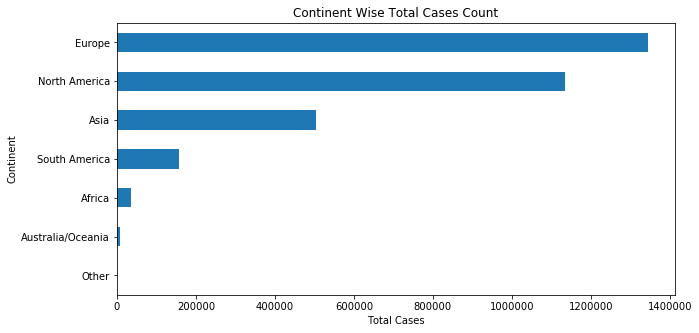

In [232]:
import matplotlib.pyplot as plt

## Get Continent Wise sum and show plot
df_continent_wise_total_counts = df.pivot_table(index='Continent', values='TotalCases', aggfunc='sum')\
.sort_values(by='TotalCases', ascending=False)\

ax = df_continent_wise_total_counts.plot(kind='barh', title='Continent Wise Total Cases Count', figsize=(10,5), legend=False)
ax.set_xlabel('Total Cases')

plt.gca().invert_yaxis()

